1. **Classification Model:** Classification is a type of supervised learning where the output is a category. For example, you might have a dataset of emails and you want to classify them as "spam" or "not spam". You train a classification model on a dataset where you already know the answer. The model learns from this data and can then classify new emails into "spam" or "not spam".

2. **Regression Model:** Regression is also a type of supervised learning, but the output is a continuous value, not a category. For example, you might want to predict the price of a house based on features like its size, location, number of rooms, etc. You train a regression model on a dataset where you know the house features and their corresponding prices. The model learns from this data and can then predict the price of a new house given its features.

3. **Clustering Model:** Clustering is a type of unsupervised learning where you want to group your data into clusters based on their similarity. The key difference here is that you don't know the answer upfront. For example, you might have a dataset of customers and you want to group them into different segments based on their purchasing behavior. You don't know in advance what these segments should be. The clustering model learns the structure of the data and determines the segments itself.

Industry: Financial Services
Problem Type: Clustering Problem: Customer Segmentation For Personalized Financial Products 
Problem Statement: 
Use a clustering algorithm to segment customers into distinct groups based on their spending habits, investment preferences, risk tolerance, and financial goals. The objective is to identify different customer segments to offer personalized financial products and services, such as tailored investment advice, customized insurance packages, or specific credit card offers. 



To solve this problem, we'll use Python and the scikit-learn library. We'll use the K-means clustering algorithm for customer segmentation. 

Please note that this is a simplified example and assumes that you have a dataset `customer_data.csv` with columns for spending habits, investment preferences, risk tolerance, and financial goals. In a real-world scenario, you would need to handle missing values, possibly use dimensionality reduction techniques, and determine the optimal number of clusters.



In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('customer_data.csv')

# Assume the columns are 'spending_habits', 'investment_preferences', 'risk_tolerance', 'financial_goals'
features = df[['spending_habits', 'investment_preferences', 'risk_tolerance', 'financial_goals']]

# Handle missing values
features = features.dropna()

# Standardize the features to have a mean=0 and variance=1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Use PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the plot, let's assume the optimal number of clusters is 5
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(pca_features)

# Add the cluster labels back to the original dataframe
df['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(pca_features[:, 0], pca_features[:, 1], hue=clusters, palette='viridis')
plt.title('Customer Segments')
plt.show()

For this project, you would ideally need a dataset that contains the following types of information for each customer:

1. **Spending Habits:** This could be represented by several features, such as average transaction amount, frequency of transactions, categories of spending (e.g., groceries, entertainment, travel), etc.

2. **Investment Preferences:** This could include types of investments the customer prefers (e.g., stocks, bonds, real estate), the proportion of income they invest, their preferred investment duration (short-term vs. long-term), etc.

3. **Risk Tolerance:** This could be a score or category indicating the customer's willingness to take financial risks. It could be derived from a questionnaire or inferred from their investment behavior.

4. **Financial Goals:** This could be a set of categorical variables indicating the customer's financial goals, such as saving for retirement, buying a house, building an emergency fund, etc.

Here's an example of how the data might look:

| CustomerID | AvgTransactionAmount | TransactionFrequency | SpendingOnGroceries | SpendingOnEntertainment | PreferredInvestmentType | IncomeInvested | InvestmentDuration | RiskTolerance | RetirementSaving | HouseBuying | EmergencyFund |
|------------|----------------------|----------------------|---------------------|-------------------------|-------------------------|----------------|-------------------|---------------|------------------|-------------|---------------|
| 1          | 500                  | 20                   | 200                 | 300                     | Stocks                  | 0.2            | Long-term         | High          | Yes              | No          | Yes           |
| 2          | 1000                 | 10                   | 500                 | 500                     | Bonds                   | 0.1            | Short-term        | Low           | No               | Yes         | No            |
| ...        | ...                  | ...                  | ...                 | ...                     | ...                     | ...            | ...               | ...           | ...              | ...         | ...           |

Each row represents a customer, and each column represents a feature related to their financial behavior or preferences. This data can then be used to segment customers using a clustering algorithm.

Sure, here's an enhanced logical data model for this dataset:

| CustomerID | Age | Gender | Occupation | AvgTransactionAmount | TransactionFrequency | SpendingOnGroceries | SpendingOnEntertainment | SpendingOnTravel | PreferredInvestmentType | IncomeInvested | InvestmentDuration | RiskTolerance | RetirementSaving | HouseBuying | EmergencyFund | CreditScore | TotalIncome |
|------------|-----|--------|------------|----------------------|----------------------|---------------------|-------------------------|-----------------|-------------------------|----------------|-------------------|---------------|------------------|-------------|---------------|-------------|-------------|
| 1          | 35  | M      | Engineer   | 500                  | 20                   | 200                 | 300                     | 100             | Stocks                  | 0.2            | Long-term         | High          | Yes              | No          | Yes           | 750         | 100000      |
| 2          | 45  | F      | Doctor     | 1000                 | 10                   | 500                 | 500                     | 200             | Bonds                   | 0.1            | Short-term        | Low           | No               | Yes         | No            | 800         | 150000      |
| ...        | ... | ...    | ...        | ...                  | ...                  | ...                 | ...                     | ...             | ...                     | ...            | ...               | ...           | ...              | ...         | ...           | ...         | ...         |

In this enhanced model, I've added the following columns:

- **Age:** The age of the customer.
- **Gender:** The gender of the customer.
- **Occupation:** The occupation of the customer.
- **SpendingOnTravel:** The amount the customer spends on travel.
- **CreditScore:** The customer's credit score.
- **TotalIncome:** The total income of the customer.

These additional features can provide more insights into the customer's financial behavior and can be useful for segmentation. For example, younger customers might have different financial goals and risk tolerance compared to older customers. Similarly, a customer's occupation might influence their income and spending habits.



This code first loads and preprocesses the data, then applies PCA for dimensionality reduction. It determines the optimal number of clusters using the elbow method and applies K-means clustering. Finally, it adds the cluster labels back to the original dataframe and visualizes the customer segments.

In [2]:
import pandas as pd
import numpy as np

# Define the number of records
n_records = 500000

# Generate random data
data = {
    'CustomerID': np.arange(1, n_records + 1),
    'Age': np.random.normal(loc=40, scale=10, size=n_records).astype(int),
    'Gender': np.random.choice(['M', 'F'], n_records, p=[0.5, 0.5]),
    'Occupation': np.random.choice(['Engineer', 'Doctor', 'Teacher', 'Lawyer', 'Other'], n_records, p=[0.2, 0.2, 0.2, 0.2, 0.2]),
    'AvgTransactionAmount': np.random.normal(loc=500, scale=100, size=n_records),
    'TransactionFrequency': np.random.poisson(lam=10, size=n_records),
    'SpendingOnGroceries': np.random.normal(loc=300, scale=50, size=n_records),
    'SpendingOnEntertainment': np.random.normal(loc=200, scale=50, size=n_records),
    'SpendingOnTravel': np.random.normal(loc=200, scale=50, size=n_records),
    'PreferredInvestmentType': np.random.choice(['Stocks', 'Bonds', 'Real Estate', 'Mutual Funds'], n_records, p=[0.25, 0.25, 0.25, 0.25]),
    'IncomeInvested': np.random.beta(a=2, b=5, size=n_records),
    'InvestmentDuration': np.random.choice(['Short-term', 'Long-term'], n_records, p=[0.4, 0.6]),
    'RiskTolerance': np.random.choice(['Low', 'Medium', 'High'], n_records, p=[0.3, 0.4, 0.3]),
    'RetirementSaving': np.random.choice([True, False], n_records, p=[0.6, 0.4]),
    'HouseBuying': np.random.choice([True, False], n_records, p=[0.5, 0.5]),
    'EmergencyFund': np.random.choice([True, False], n_records, p=[0.7, 0.3]),
    'CreditScore': np.random.normal(loc=600, scale=50, size=n_records).astype(int),
    'TotalIncome': np.random.normal(loc=100000, scale=20000, size=n_records)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('customer_data_final.csv', index=False)

In [20]:
# Define the number of records
n_records = 50000

# Generate random data
data = {
    'CustomerID': np.arange(1, n_records + 1),
    'Age': np.random.normal(loc=40, scale=15, size=n_records).astype(int), 
    'Gender': np.random.choice(['M', 'F'], n_records, p=[0.5, 0.5]),
    'Occupation': np.random.choice(['Engineer', 'Doctor', 'Teacher', 'Lawyer', 'Other'], n_records, p=[0.1, 0.2, 0.3, 0.2, 0.2]), 
    'AvgTransactionAmount': np.random.normal(loc=500, scale=200, size=n_records), 
    'TransactionFrequency': np.random.poisson(lam=15, size=n_records),  
    'SpendingOnGroceries': np.random.normal(loc=300, scale=100, size=n_records),  
    'SpendingOnEntertainment': np.random.normal(loc=200, scale=100, size=n_records),  
    'SpendingOnTravel': np.random.normal(loc=200, scale=100, size=n_records), 
    'PreferredInvestmentType': np.random.choice(['Stocks', 'Bonds', 'Real Estate', 'Mutual Funds'], n_records, p=[0.2, 0.3, 0.3, 0.2]), 
    'IncomeInvested': np.random.beta(a=2, b=5, size=n_records),
    'InvestmentDuration': np.random.choice(['Short-term', 'Long-term'], n_records, p=[0.5, 0.5]), 
    'RiskTolerance': np.random.choice(['Low', 'Medium', 'High'], n_records, p=[0.2, 0.5, 0.3]),  
    'RetirementSaving': np.random.choice([True, False], n_records, p=[0.5, 0.5]), 
    'HouseBuying': np.random.choice([True, False], n_records, p=[0.5, 0.5]),
    'EmergencyFund': np.random.choice([True, False], n_records, p=[0.5, 0.5]),  
    'CreditScore': np.random.normal(loc=600, scale=100, size=n_records).astype(int), 
    'TotalIncome': np.random.normal(loc=100000, scale=30000, size=n_records)  
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('customer_data_vast_50000.csv', index=False)  # changed file name

c:\Users\rishav.raj.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


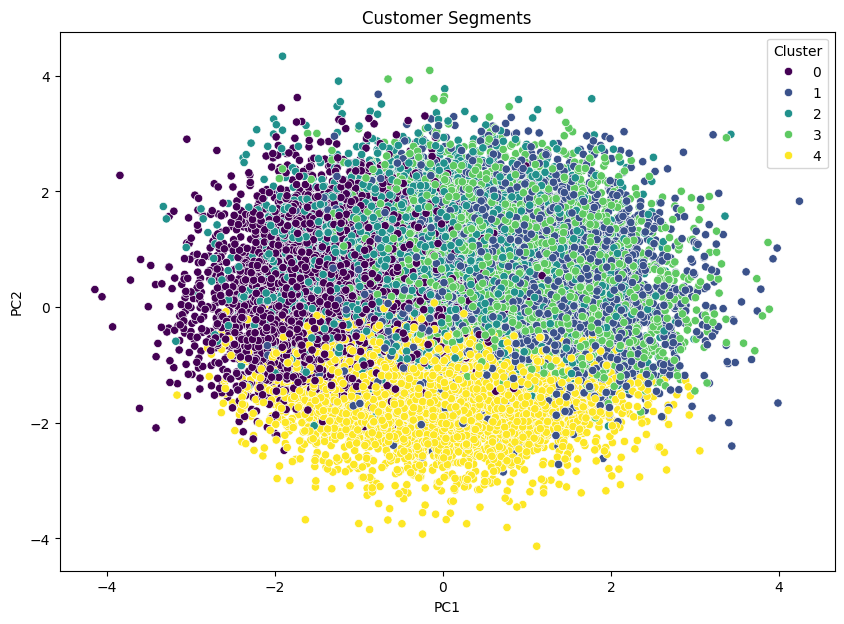

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Convert boolean columns to int
bool_cols = ['RetirementSaving', 'HouseBuying', 'EmergencyFund']
df[bool_cols] = df[bool_cols].astype(int)

# Label encode categorical columns
le = LabelEncoder()
cat_cols = ['Gender', 'Occupation', 'PreferredInvestmentType', 'InvestmentDuration', 'RiskTolerance']
df[cat_cols] = df[cat_cols].apply(le.fit_transform)

# Standardize numerical columns
scaler = StandardScaler()
num_cols = ['Age', 'AvgTransactionAmount', 'TransactionFrequency', 'SpendingOnGroceries', 'SpendingOnEntertainment', 'SpendingOnTravel', 'IncomeInvested', 'CreditScore', 'TotalIncome']
df[num_cols] = scaler.fit_transform(df[num_cols])

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[num_cols])

pca = PCA(n_components=2)
df[['PC1', 'PC2']] = pca.fit_transform(df[num_cols])

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='viridis', legend='full')
plt.title('Customer Segments')
plt.show()


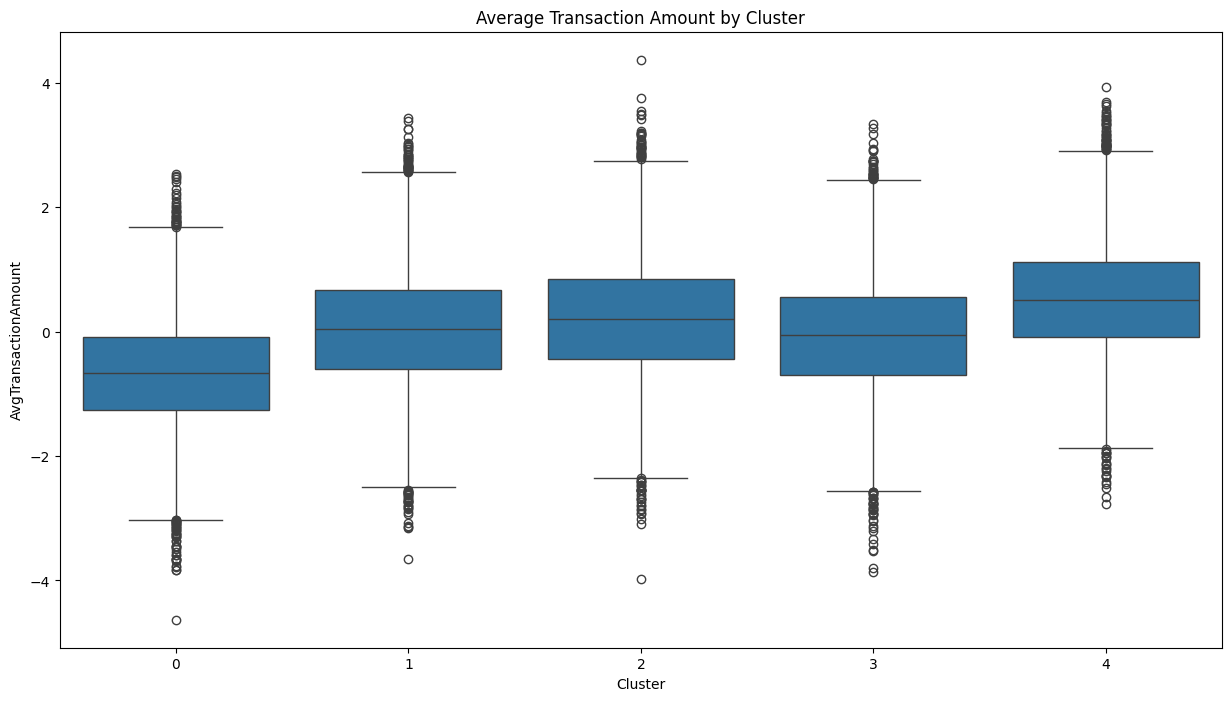

In [22]:

# Box Plot for Numerical Features
plt.figure(figsize=(15, 8))
sns.boxplot(x='Cluster', y='AvgTransactionAmount', data=df)
plt.title('Average Transaction Amount by Cluster')
plt.show()


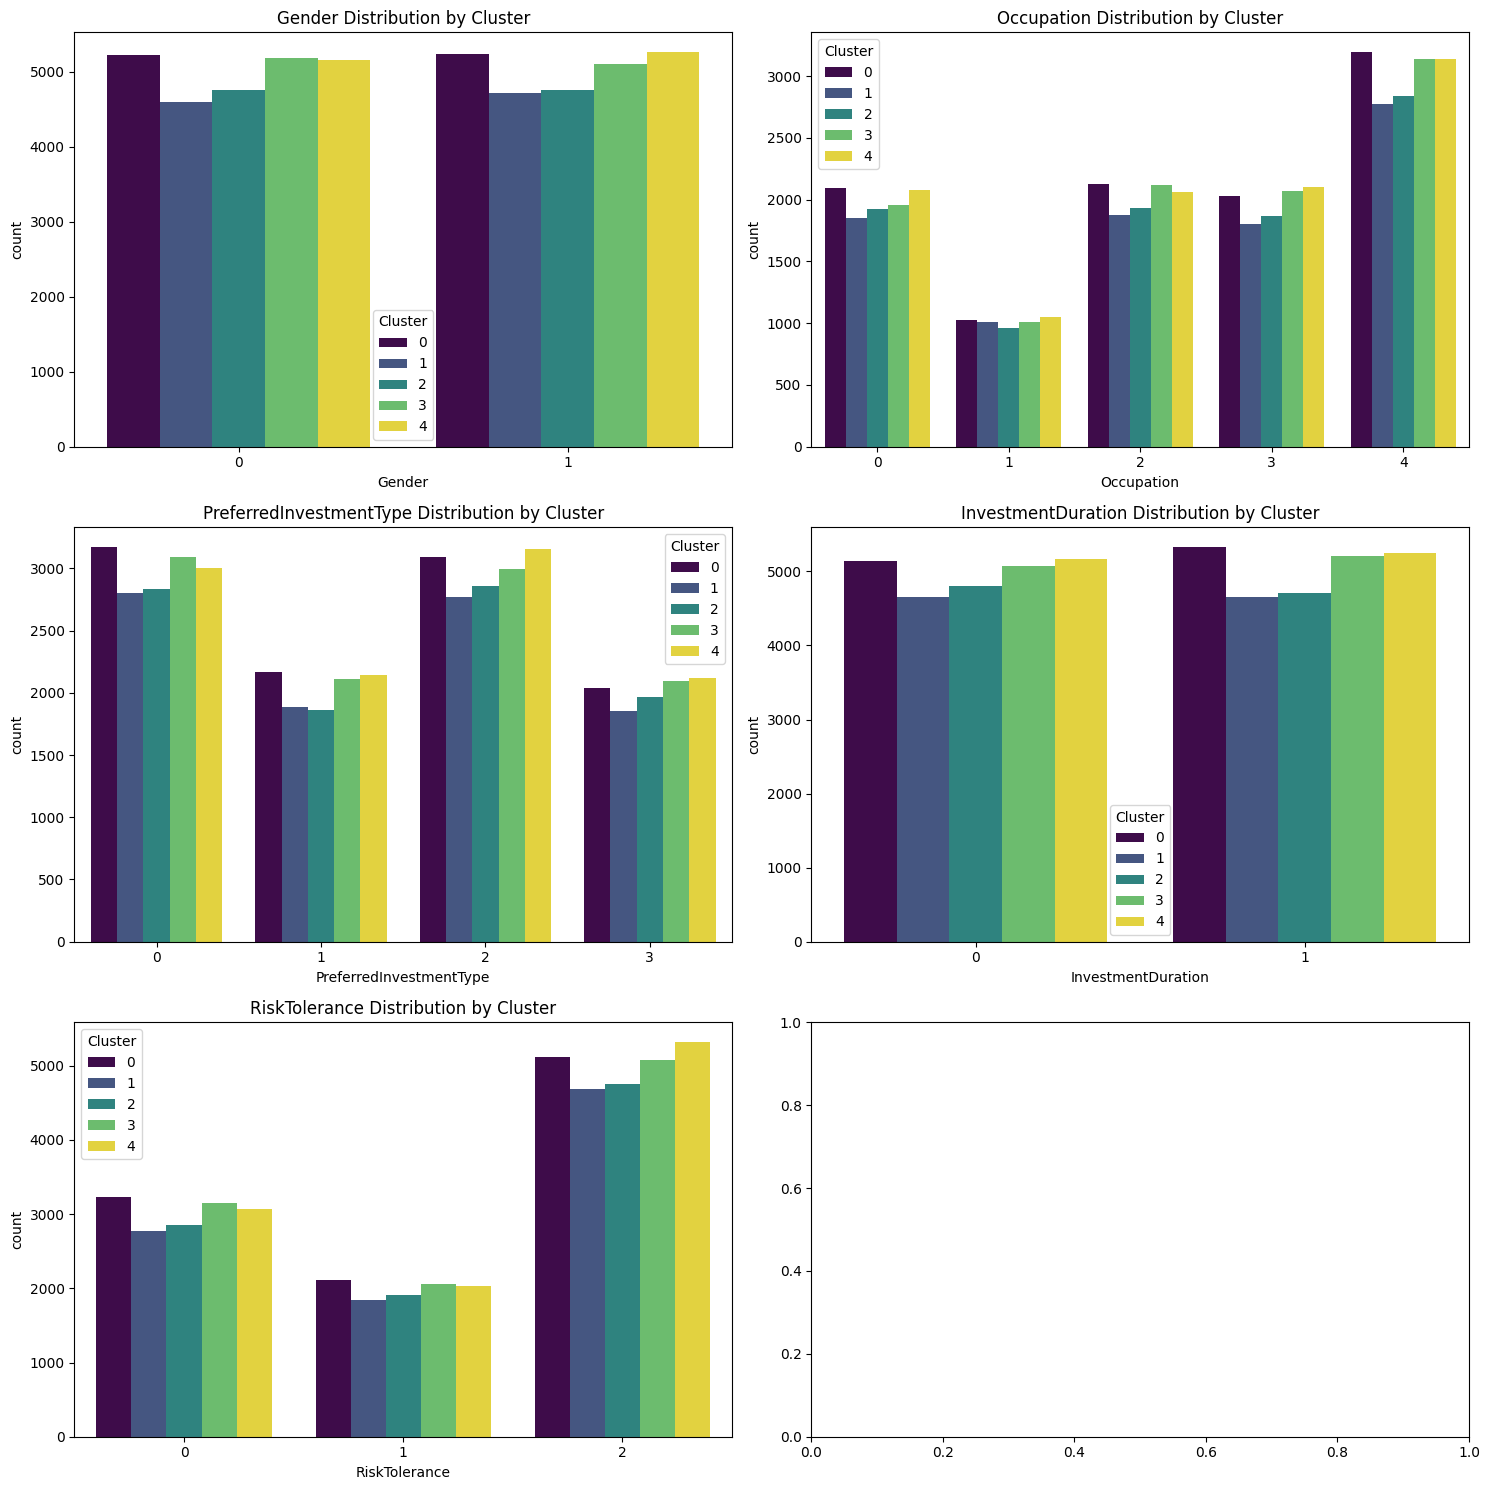

In [23]:
# Bar Plots for Categorical Features
num_cat_cols = len(cat_cols)
num_rows = num_cat_cols // 2 + num_cat_cols % 2  # Calculate the number of rows for subplots

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='Cluster', data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} Distribution by Cluster')

plt.tight_layout()
plt.show()

In [24]:
cluster_centroids = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centroids, columns=num_cols)


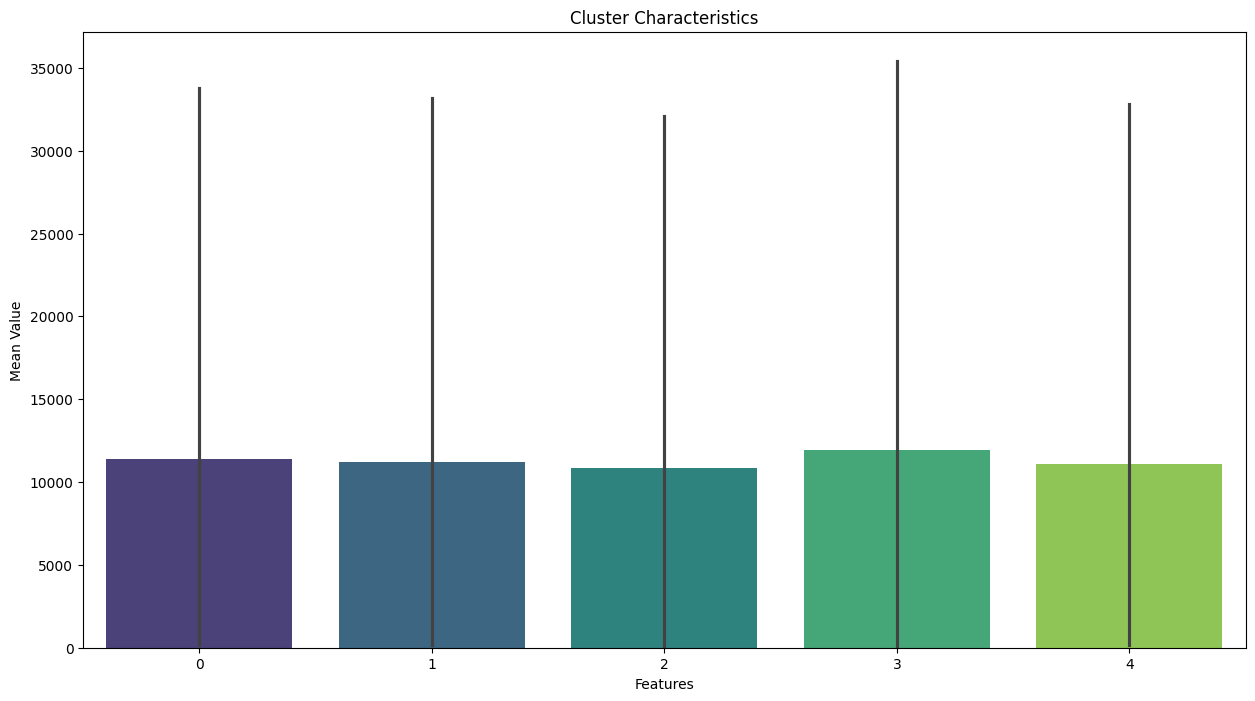

In [25]:
plt.figure(figsize=(15, 8))
sns.barplot(data=cluster_df.transpose(), palette='viridis')
plt.title('Cluster Characteristics')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.show()


In [26]:
df['Cluster_Labels'] = df['Cluster'].map({0: 'Label_0', 1: 'Label_1', 2: 'Label_2', 3: 'Label_3', 4: 'Label_4'})
df


,CustomerID,Age,Gender,Occupation,AvgTransactionAmount,TransactionFrequency,SpendingOnGroceries,SpendingOnEntertainment,SpendingOnTravel,PreferredInvestmentType,...,RiskTolerance,RetirementSaving,HouseBuying,EmergencyFund,CreditScore,TotalIncome,Cluster,PC1,PC2,Cluster_Labels
0,1,-1.096605,1,3,0.414681,0.511776,0.995327,0.598436,-1.319701,1,...,0,1,1,0,-0.180985,-0.681691,2,-0.885585,0.203548,Label_2
1,2,1.774074,1,2,-1.380931,1.283041,-0.140456,-0.467062,-1.057015,0,...,2,0,1,0,-0.011413,-2.353947,2,-0.210151,1.337640,Label_2
2,3,0.705915,1,4,1.413937,0.511776,-0.297585,0.370410,0.045709,1,...,0,0,0,0,0.407531,-0.325643,2,-0.035891,-0.617396,Label_2
3,4,-0.562525,1,2,1.186780,-0.259490,-0.542144,-0.946930,0.115176,1,...,2,0,1,0,0.247933,-2.170546,3,-0.060663,0.061150,Label_3
4,5,0.372115,1,2,0.200068,1.540130,0.615015,0.178752,0.477466,2,...,1,1,1,0,-0.769502,-1.324973,2,-0.220789,-0.171077,Label_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,-0.295485,0,3,0.913327,0.511776,-1.085698,-0.043857,1.132583,2,...,1,1,1,0,0.816499,-1.157283,2,-1.014363,-0.042208,Label_2
49996,49997,0.572395,1,2,-0.577271,1.283041,0.192375,-0.467461,0.235385,1,...,2,0,0,0,1.115745,-0.222057,2,-0.740661,1.027701,Label_2
49997,49998,-1.163365,0,1,0.869661,-1.544932,1.033274,0.350619,0.483185,0,...,2,0,1,0,0.926223,-0.054907,1,-0.690918,-0.707104,Label_1
49998,49999,0.972955,0,3,1.107105,1.025953,-0.128088,0.572834,-0.085696,2,...,1,0,1,0,-1.238319,-0.908070,4,0.431613,-1.038481,Label_4


To interpret the clusters and understand what each represents in your specific problem, follow these steps:

1. **Analyze Cluster Centroids:**
   - After performing KMeans clustering, you can examine the cluster centroids. These are the mean values of features for each cluster.
   - Use `kmeans.cluster_centers_` to get the centroid values.

   ```python
   cluster_centroids = scaler.inverse_transform(kmeans.cluster_centers_)
   cluster_df = pd.DataFrame(cluster_centroids, columns=num_cols)
   ```

   This `cluster_df` will give you the mean values of numerical features for each cluster. Analyze these values to understand the characteristics of each cluster.

2. **Visualize Cluster Characteristics:**
   - Create visualizations to compare the characteristics of different clusters.
   - You can use bar plots, box plots, or any other visualization that suits your data.

   ```python
   plt.figure(figsize=(15, 8))
   sns.barplot(data=cluster_df.transpose(), palette='viridis')
   plt.title('Cluster Characteristics')
   plt.xlabel('Features')
   plt.ylabel('Mean Value')
   plt.show()
   ```

3. **Assign Meaningful Labels:**
   - Based on your analysis, assign meaningful labels to each cluster.
   - For example, if one cluster has higher spending and higher risk tolerance, you might label it as "High Spenders, High Risk Tolerance."

4. **Map Labels to Original DataFrame:**
   - Map the cluster labels back to the original DataFrame to understand the characteristics of individual data points.

   ```python
   df['Cluster_Labels'] = df['Cluster'].map({0: 'Label_0', 1: 'Label_1', 2: 'Label_2', 3: 'Label_3', 4: 'Label_4'})
   ```

   This will create a new column `Cluster_Labels` in your original DataFrame with meaningful labels.

5. **Further Analysis and Action:**
   - Based on your problem statement, consider what personalized financial products or services would be suitable for each cluster.
   - You might tailor investment advice, insurance packages, or credit card offers based on the characteristics of each customer segment.

Remember that the interpretation of clusters is highly dependent on your specific domain and dataset. Analyzing cluster centroids and visualizing cluster characteristics are crucial steps in understanding the distinct groups identified by the clustering algorithm. Adjust the number of clusters and features used in clustering based on the insights gained during this analysis.

1. **PC1 and PC2:**
   - `PC1` and `PC2` stand for Principal Component 1 and Principal Component 2, respectively.
   - Principal Components are linear combinations of the original features that capture the most significant variance in the data.
   - In the context of clustering visualization, `PC1` and `PC2` are two dimensions (axes) in a reduced feature space obtained through Principal Component Analysis (PCA).
   - These dimensions are chosen to maximize the variance, meaning that the most important information about the data is retained.

2. **Cluster Labels:**
   - The `Cluster` column represents the clusters assigned by the KMeans clustering algorithm.
   - In the code, `KMeans(n_clusters=5, random_state=42)` is used to create five clusters (you can adjust the number based on your requirements).
   - Each data point in the dataset is assigned to one of these clusters based on its features.
   - The clusters are represented by integers (0 to 4 in this case) in the `Cluster` column.

3. **Interpreting Clusters:**
   - The specific interpretation of clusters depends on the characteristics of the data and the features used.
   - In a customer segmentation scenario, clusters might represent groups of customers with similar spending habits, preferences, or financial behaviors.
   - You can analyze the cluster centroids (the mean values of features in each cluster) to understand the characteristics that define each group.
   - It's common to perform further analysis or even give meaningful names to the clusters based on these characteristics.

In summary, `PC1` and `PC2` are two dimensions obtained through PCA for visualization, and the `Cluster` column represents the assigned clusters by KMeans. Interpretation of clusters requires a deeper understanding of the specific domain and features used in the clustering process.